## Лабораторная работа 2
## Коррекция яркости и цвета
## Котов И. Ю.
## РИМ-181226

In [24]:
from skimage.io import imread, imshow
from skimage import img_as_float, img_as_ubyte
from skimage.color import rgb2gray
import numpy as np
from numpy import dstack, roll, clip
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
img_low_contrast = imread('C:\\Users\\Vanya\\Desktop\\2 семестр\\Анализ изображений\\images\\tiger-low-contrast.png')

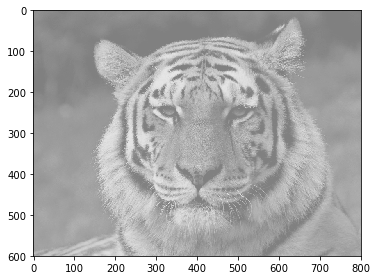

In [5]:
imshow(img_low_contrast)

## Автоконтраст низкоконтрастного изображения:

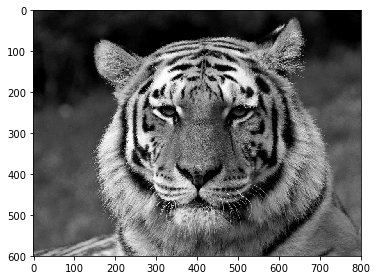

In [7]:
Xmin = min(img_low_contrast.ravel())
Xmax = max(img_low_contrast.ravel())
k = 255/(Xmax-Xmin)
imshow(((img_low_contrast-Xmin)*k).astype('uint8'))

## Подсчет минимума и максимума устойчивого автоконтраста

In [18]:
def get_min_max_autocontr(img):
    
    img_f  = img.astype(float)
    k      = round(len(img_low_contrast_f.ravel())*0.05)
    pixels = sorted(img_low_contrast_f.ravel())[k:-k]
    
    return min(pixels), max(pixels)

In [11]:
print(get_min_max_autocontr(img_low_contrast))

(129.0, 208.0)


## Устойчивый автоконтраст черно-белого изображения

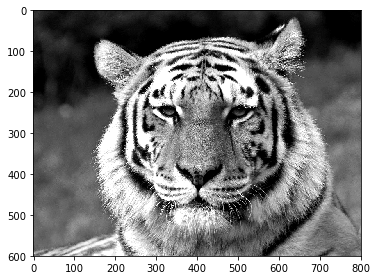

In [17]:
min_autocor, max_autocor = get_min_max_autocontr(img)
img_f = img.astype('float')

img_f = (img_f - min_autocor) * 255/(max_autocor - min_autocor)
img_f = np.clip(img_f, 0, 255)
img_f = img_f.astype('uint8')
imshow(img_f)

## Коррекция контраста цветного изображения

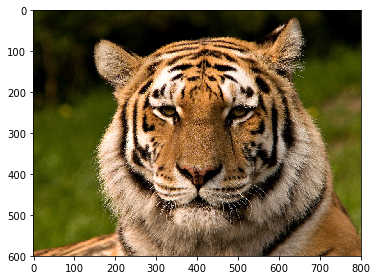

In [26]:
img= imread('C:\\Users\\Vanya\\Desktop\\2 семестр\\Анализ изображений\\images\\tiger-color.png')
img = img_as_float(img)
imshow(img)

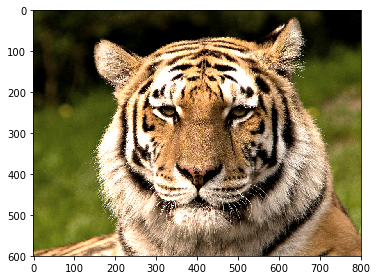

In [27]:
def get_contrast(img, Xmin, Xmax, max_c=255): 
    k=1/(Xmax-Xmin) 
    img_contrast=((img-Xmin)*k) 
    return img_contrast 

def get_min_max(img): 
    img=img.astype(float) 
    k=int(round(len(img.ravel())*0.05))
    pixels=sorted(img.ravel())[k:-k] 
    Xmin, Xmax=min(pixels), max(pixels) 
    return Xmin, Xmax

r = img[:,:,0]
g = img[:,:,1]
b = img[:,:,2]

y =  0.2126*r + 0.7152*g + 0.0722*b
u = -0.0999*r - 0.3360*g + 0.4360*b
v =  0.6150*r - 0.5586*g - 0.0563*b

img_yuv = dstack([y,u,v])

y_float=img_yuv[:, :, 0].astype(float) 
k=int(len(y_float.ravel())*0.05)
pixels=sorted(y_float.ravel())[k:-k] 
Xmin, Xmax=min(pixels), max(pixels)
k=1/(Xmax-Xmin) 
img_yuv[:, :, 0]=((img_yuv[:, :, 0]-Xmin)*k) 

y = img_yuv[:,:,0]
u = img_yuv[:,:,1]
v = img_yuv[:,:,2]

r = y + 1.2803 * v
g = y - 0.2148 * u - 0.3805 * v
b = y + 2.1279 * u

img_rgb = clip(dstack([r,g,b]),0,1)
img_rgb=(img_rgb*255).astype('uint8')

imshow(img_rgb)

## Преобразование серого мира

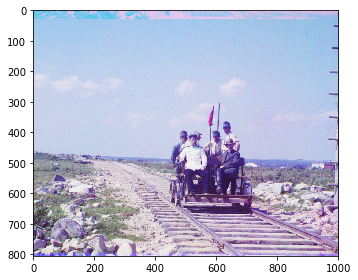

In [28]:
img= imread('C:\\Users\\Vanya\\Desktop\\2 семестр\\Анализ изображений\\images\\railroad.png')
img = img_as_float(img)
imshow(img)

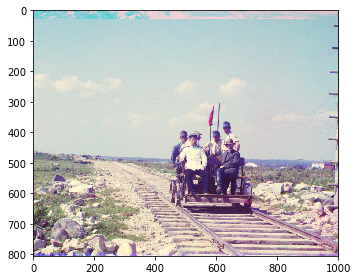

In [29]:
r = img[:,:,0]
g = img[:,:,1]
b = img[:,:,2]

r_avg = np.mean(r)
g_avg = np.mean(g)
b_avg =  np.mean(b)

avg = (r_avg+g_avg+b_avg)/3

r_k = r_avg / avg
g_k = g_avg / avg
b_k = b_avg / avg

r = r/r_k
g = g/g_k
b = b/b_k

imshow(clip(dstack([r,g,b]),0,1))

## Выравнивание гистограммы

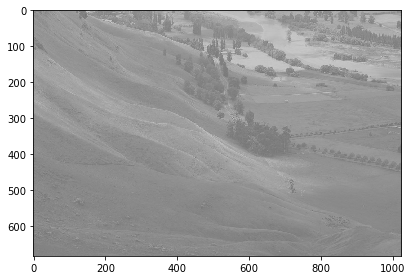

In [32]:
img = imread('C:\\Users\\Vanya\\Desktop\\2 семестр\\Анализ изображений\\images\\landscape.png')
imshow(img)

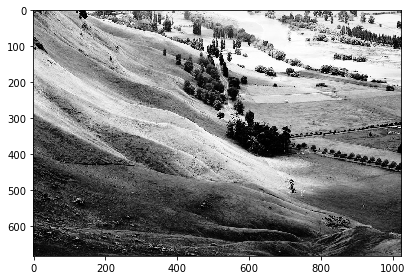

In [33]:
count_pixels = [ np.sum(img.ravel() == k) for k in range(0, 255) ] 
cdf = np.array([np.sum(count_pixels[:x]) for x in range(0, 255)]) 
img_corr = np.array([round((cdf[px]-min(cdf[cdf>0]) )*255/(img.ravel().shape[0] -1)) for px in img.ravel()]).reshape([683, 1024])
img_corr = clip(img_corr,0,255).astype('uint8')
imshow(img_corr)